<a href="https://colab.research.google.com/github/CoolWolfy96/MAT421/blob/main/Module_D_Section_1_1%2C_1_2%2C_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:** Linear Algebra in exact terms deals with systems of linear equations which are equations written as a₀x₀ + a₁x₁ + a₂x₂ ... + aₙxₙ = b.
*   aₙ: constant coefficient  
*   xₙ: unknown variables
*   b: constant

Alternatively this system can be written using matricies and vectors in the form Ax = b. Vectors can be thought of as 1d arrays and matricies as 2d arrays when coding.

**Elements of Linear Algebra:** V is a **linear space** where V = ℝⁿ which is the set of all ordered sequences of real numbers of length n i.e. ∀x∀y (x,y) ∈ V. A **linear subspace** is a closed subset of V. A linear space can be represented in terms of a set of vectors called the **spanning set** of that linear space. The **column vectors** in a nxm matrix called A make a spanning set of the column space of A. **Linear Independence** is a property between vectors where a vector cannot be written as a linear combination of the other vectors. A special case of a spanning set where the vectors are also linearly independent is called a **basis**. The number of spanning vectors in a basis is denoted as the **dimension** of the subspace it represents. If vectors in that basis are the column vector of a matrix A, then the dimension is also called the **rank** of A. An orthonormal basis is a special case where vectors are all orthogonal to each other and have a magnitude of 1.


In [52]:
import numpy as np
from numpy.linalg import det
from numpy.linalg import inv
from numpy.linalg import matrix_rank
from numpy.linalg import solve
import sympy

# basic operations when dealing with matricies in python

# addition
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[9,8,7],[6,5,4],[3,2,1]])
print("Addition: \n" + str(A + B))

# multiplication
print("Multiplication: \n" + str(A * B))

# determinant and inverse
print("Determinant: \n" + str(det(A)))
print("Inverse: \n" + str(inv(2*np.eye(4))))

# dot and cross product
A = np.array([1,2,3])
B = np.array([9,8,7])
print("Dot Product: \n" + str(np.dot(A,B)))
print("Cross Product: \n" + str(np.cross(A,B)))

# rref and rank
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
M = Matrix([[1,2,3],[4,5,6],[7,8,9]])
print("RREF: \n" + str(M.rref()))
print("Rank: \n" + str(matrix_rank(A)))


Addition: 
[[10 10 10]
 [10 10 10]
 [10 10 10]]
Multiplication: 
[[ 9 16 21]
 [24 25 24]
 [21 16  9]]
Determinant: 
0.0
Inverse: 
[[0.5 0.  0.  0. ]
 [0.  0.5 0.  0. ]
 [0.  0.  0.5 0. ]
 [0.  0.  0.  0.5]]
Dot Product: 
46
Cross Product: 
[-10  20 -10]
RREF: 
(Matrix([
[1, 0, -1],
[0, 1,  2],
[0, 0,  0]]), (0, 1))
Rank: 
2


An **eigenvalue** is a scalar that satifies the equation Ax = λx where A is a square matrix and x is an **eigenvector**.

In [53]:
from numpy.linalg import eig

# eigenvalues and eigenvectors using numpy
A = np.array([[2,1,3],[1,2,3],[3,3,20]])
A,B = eig(A)
A = np.round(A,2)
B = np.round(B,2)
print("Eigenvalues: \n" + str(A))
print("Eigenvectors: \n" + str(B))

Eigenvalues: 
[21.  1.  2.]
Eigenvectors: 
[[-0.16 -0.71 -0.69]
 [-0.16  0.71 -0.69]
 [-0.97 -0.    0.23]]


**Linear Regression:** Given a problem of solving the matrix equation Ax = b, sometimes it is not possible to find x that satifies b. Instead, we find x that most closely approximates b. This can be calculated by summing up the elements of the matrix (y-b)^2 where y is the approximate values of b.
This problem is called the **least-square problem** which can be solved for x by evaluating

(A^T * A)^-1 * A^T * b.

Another more numerically stable method involves finding the QR decomposition of A then solving the expression R^-1 * Q^T * b.

Q: 
[[-0.53  0.62 -0.58]
 [-0.27 -0.77 -0.58]
 [-0.8  -0.15  0.58]]
R: 
[[ -3.74  -3.47 -18.44]
 [  0.    -1.39  -3.55]
 [  0.     0.     8.08]]


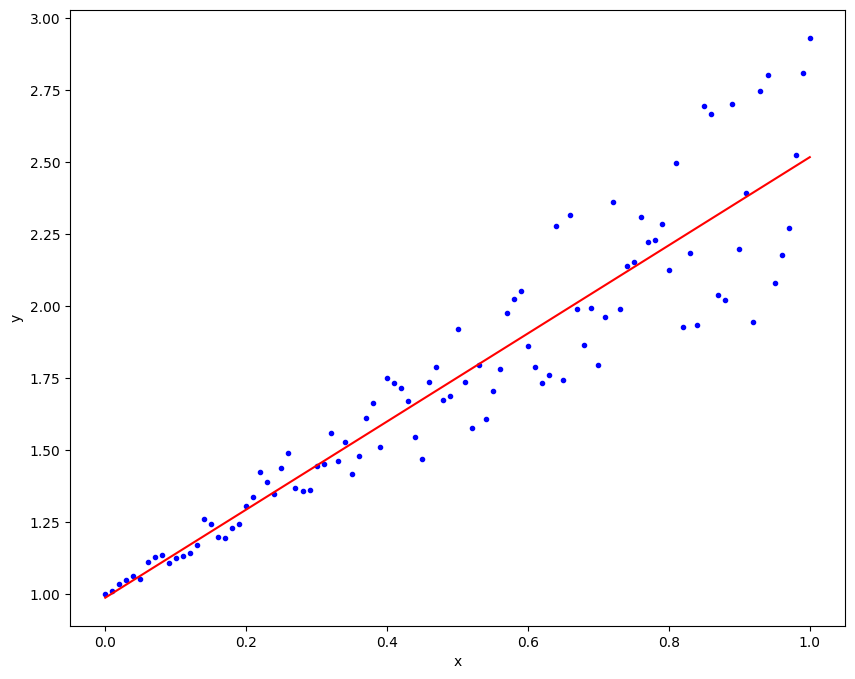

In [54]:
from numpy.linalg import qr
from scipy import optimize
import matplotlib.pyplot as plt

A = np.array([[2,1,3],[1,2,3],[3,3,20]])
Q, R = qr(A)
Q = np.round(Q,2)
R = np.round(R,2)

print("Q: \n" + str(Q))
print("R: \n" + str(R))

x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()